In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# подключение к данным
raw_data = pd.read_csv('data/cars.csv')

# переопределим названия полей
cars = raw_data.rename(columns = {
    'Car ID' : 'car_id',
    'Brand' : 'brand',
    'Year' : 'year',
    'Engine Size' : 'eng_size',
    'Fuel Type' : 'fuel_type',
    'Transmission' : 'trans',
    'Mileage' : 'mil',
    'Condition' : 'condition',
    'Price' : 'price',
    'Model' : 'model'
})

display(cars.sample(5))

,car_id,brand,year,eng_size,fuel_type,trans,mil,condition,price,model
1846,1847,Tesla,2010,1.8,Diesel,Manual,2473,New,35229.65,Model 3
2471,2472,Toyota,2009,3.3,Petrol,Manual,87342,Used,51779.02,Corolla
1090,1091,Tesla,2002,5.8,Diesel,Manual,16292,Used,99034.93,Model 3
2291,2292,BMW,2020,3.5,Diesel,Automatic,295187,Used,56527.43,X3
531,532,Honda,2020,4.3,Diesel,Automatic,91080,Used,33870.58,Civic


In [4]:
# Беглый взгляд на данные
cars.info()
round(cars.describe(include="number"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_id     2500 non-null   int64  
 1   brand      2500 non-null   object 
 2   year       2500 non-null   int64  
 3   eng_size   2500 non-null   float64
 4   fuel_type  2500 non-null   object 
 5   trans      2500 non-null   object 
 6   mil        2500 non-null   int64  
 7   condition  2500 non-null   object 
 8   price      2500 non-null   float64
 9   model      2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


,car_id,year,eng_size,mil,price
count,2500.0,2500.0,2500.0,2500.0,2500.0
mean,1250.0,2012.0,3.0,149750.0,52638.0
std,722.0,7.0,1.0,87920.0,27296.0
min,1.0,2000.0,1.0,15.0,5011.0
25%,626.0,2005.0,2.0,71832.0,28908.0
50%,1250.0,2012.0,3.0,149085.0,53485.0
75%,1875.0,2018.0,5.0,225990.0,75839.0
max,2500.0,2023.0,6.0,299967.0,99983.0


# Описательная статистика

## Среднее

Чтобы вычислить выборочное среднее, нужно сложить все значения и разделить на их количество. Воспользуемся библиотекой Pands для нахождения среднего значения по году. 

In [5]:
# Фильтрация данных по условиям
mask = (cars['year'] == 2010) #& (cars['condition'] == 'New')

# Сумма цен автомобилей
price_car = cars.loc[mask, 'price'].sum().round(2)

# Количество автомобилей
count_car = cars.loc[mask, 'condition'].count()

# Средняя цена автомобиля
average_price = (price_car / count_car).round(2)

# Отображение результатов
print(f"Сумма цен автомобилей: {price_car}")
print(f"Количество автомобилей: {count_car}")
print(f"Средняя цена автомобиля: {average_price}")

Сумма цен автомобилей: 5096773.24
Количество автомобилей: 95
Средняя цена автомобиля: 53650.24


In [6]:
# Агрегируем, получая сумму и среднее
cars_group_year = cars.groupby(['year', 'condition']).agg({'price': ['sum', 'mean', 'count']})

# Округлим до 2 знаков после запятой и сбросим индекс
cars_group_year = cars_group_year.round(2).reset_index()

cars_group_year.columns = ['year', 'condition', 'price_sum', 'price_mean', 'price_count']

# Смотрим на данные 
display(cars_group_year)

,year,condition,price_sum,price_mean,price_count
0,2000,Like New,1722954.12,47859.84,36
1,2000,New,1469742.98,52490.82,28
2,2000,Used,1745060.10,60174.49,29
3,2001,Like New,1953000.50,52783.80,37
4,2001,New,1706116.05,51700.49,33
...,...,...,...,...,...
67,2022,New,2419885.32,52606.20,46
68,2022,Used,1840875.29,59383.07,31
69,2023,Like New,1721911.35,52179.13,33
70,2023,New,1932824.20,46019.62,42


Построим простую визуализацию для отображения данных 

Для начала используем matplotlib

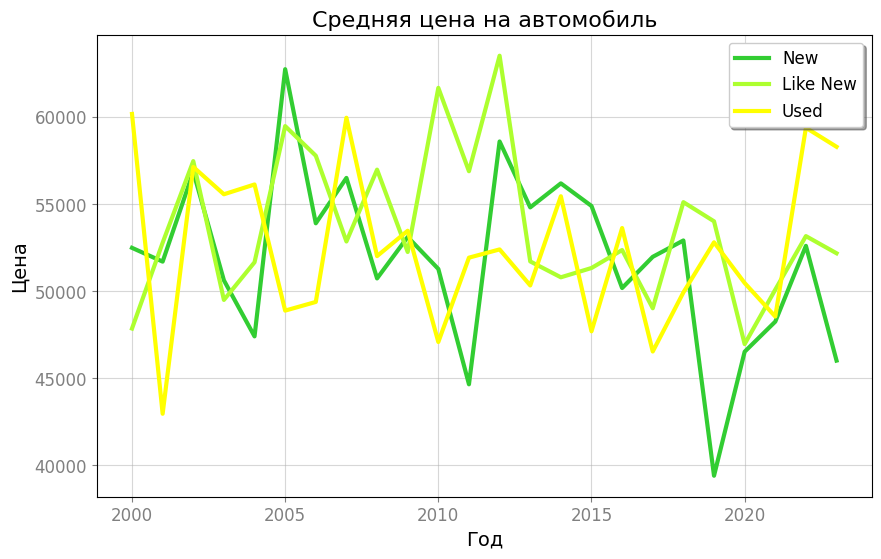

In [7]:
# Выбираем данные для оси X и оси Y
years = cars_group_year['year'] # Берём только уровень 'year' из MultiIndex
new = cars_group_year[cars_group_year['condition'] == 'New']
like_new = cars_group_year[cars_group_year['condition'] == 'Like New']
used = cars_group_year[cars_group_year['condition'] == 'Used']


# Построение графика
plt.figure(figsize=(10, 6))  # Размеры графика

# Добавляем линиb графика
plt.plot(new['year'], new['price_mean'], linestyle='-', linewidth=3, color='#32CD32', label='New')
plt.plot(like_new['year'], like_new['price_mean'], linestyle='-', linewidth=3, color='#ADFF2F', label='Like New')
plt.plot(used['year'], used['price_mean'], linestyle='-', linewidth=3, color='#FFFF00', label='Used')

# Настройка заголовков и подписей
plt.title('Средняя цена на автомобиль', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена', fontsize=14)

# Добавляем сетку
plt.grid(True, alpha=0.5)

# Настройка подписей осей
plt.tick_params(axis='both', labelsize=12, colors='gray')

# Добавляем легенду
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Отображаем график
plt.show()


По аналогии построим график в seaborn

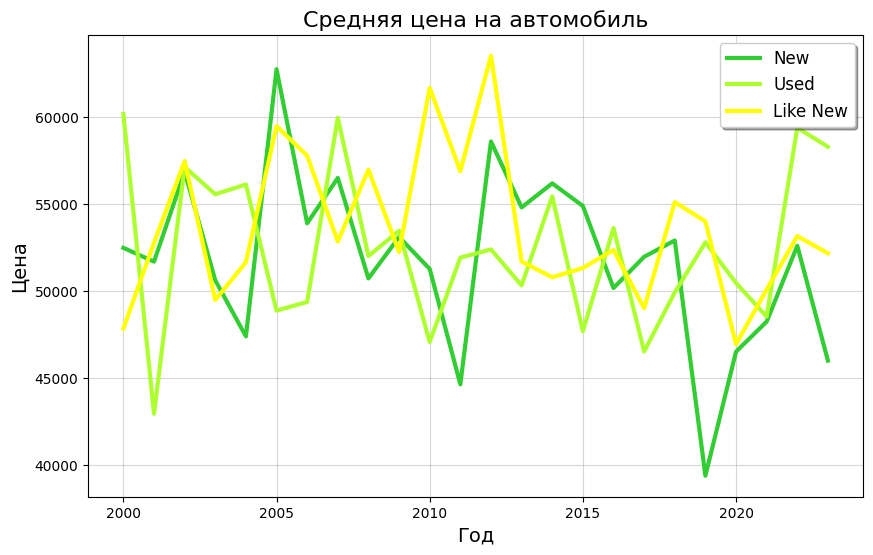

In [8]:
plt.figure(figsize=(10, 6))

# Построение графика без закраски вдоль линий (ci=None)
sns.lineplot(
    x=cars['year'], 
    y=cars['price'], 
    hue=cars['condition'], 
    errorbar=None,
    palette = ['#32CD32', '#ADFF2F', '#FFFF00'], 
    linewidth=3)

plt.title('Средняя цена на автомобиль', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена', fontsize=14)

plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

plt.show()

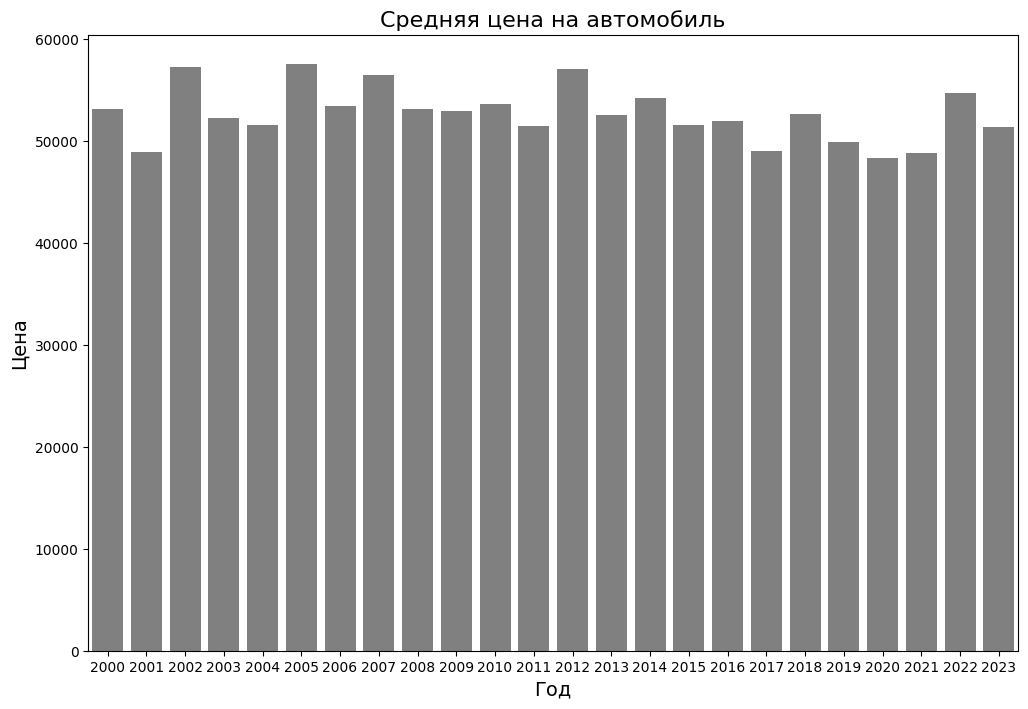

In [9]:
# Группируем данные по году и вычисляем среднюю цену
mean_price = cars.groupby('year')['price'].mean().reset_index()

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='price', data=mean_price, errorbar=None, color='grey')

# Настройка графика
plt.title('Средняя цена на автомобиль', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена', fontsize=14)

# Добавляем сетку
plt.grid(False)

# Отображаем график
plt.show()

## Медиана

Найдем медианное значение цены на подержанные тойоты

In [10]:
# Для начала найдем среднюю цену на подержанную тойоту по всем годам

# выбереме только подеражанные тойоты
used_toyotas = cars.query('brand == "Toyota" and condition == "Used"')

# выведем среднюю цену на экран
print(f'Средняя цена на подежанную тойоту в данных составляет {used_toyotas['price'].mean().round(2)}')

Средняя цена на подежанную тойоту в данных составляет 52241.69


In [11]:
# Теперь найдем медианное значение

print(used_toyotas['price'].sort_values()) # отсортируем цены по возврастанию

print(f'\nМедианное значение цены на подержанную тойту составляет {used_toyotas['price'].median().round(2)}')

2464     6178.92
1959     6355.76
1425     8673.23
1612     8716.86
2070     8818.88
          ...   
2373    95242.86
1502    95390.34
123     95981.89
1436    98496.67
1885    99400.47
Name: price, Length: 145, dtype: float64

Медианное значение цены на подержанную тойту составляет 50250.98


In [12]:
#Таким образом разница между средним и медианным значением составляет
print(f'Абсолютная разница: {used_toyotas['price'].mean() - used_toyotas['price'].median():.2f} $')
print(f'Относительная разница: {((used_toyotas['price'].mean() - used_toyotas['price'].median()) / used_toyotas['price'].median() * 100):.2f} %')

Абсолютная разница: 1990.71 $
Относительная разница: 3.96 %


Визуально отобразим медиану и среднее на гистограмме распределения используя библиотеку seaborn

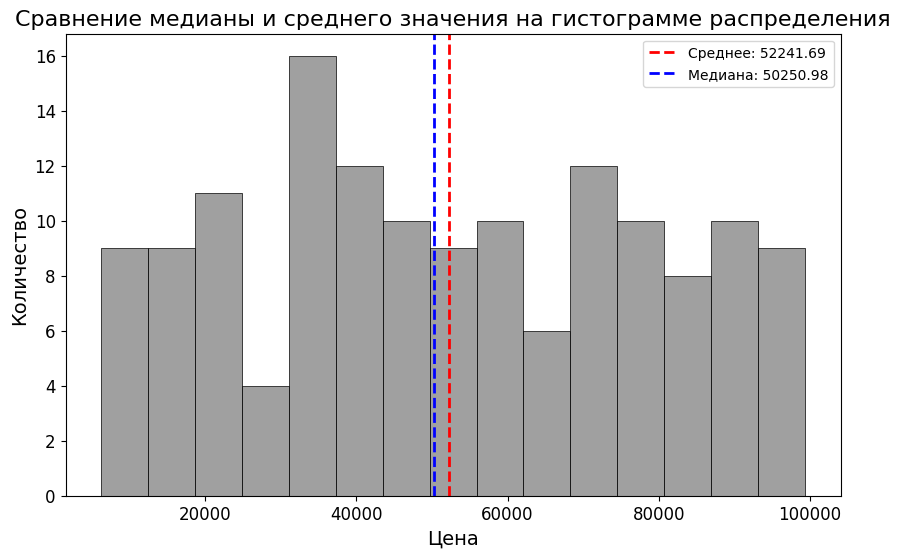

In [13]:
plt.figure(figsize = (10,6))

sns.histplot(data = used_toyotas,
             x = 'price',
             bins = 15,            
             color = 'grey',
             linewidth = 0.5)

mean = used_toyotas['price'].mean()
median = used_toyotas['price'].median()

plt.axvline(mean, color = 'red', linestyle = '--', linewidth = 2, label = f'Среднее: {mean:.2f}')
plt.axvline(median, color = 'blue', linestyle = '--', linewidth = 2, label = f'Медиана: {median:.2f}')

plt.title('Сравнение медианы и среднего значения на гистограмме распределения', fontsize = 16)
plt.xlabel('Цена', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Количество', fontsize = 14)
plt.yticks(fontsize = 12)
plt.legend()

plt.show()

Повторим визуализацию но уже в matplotlib

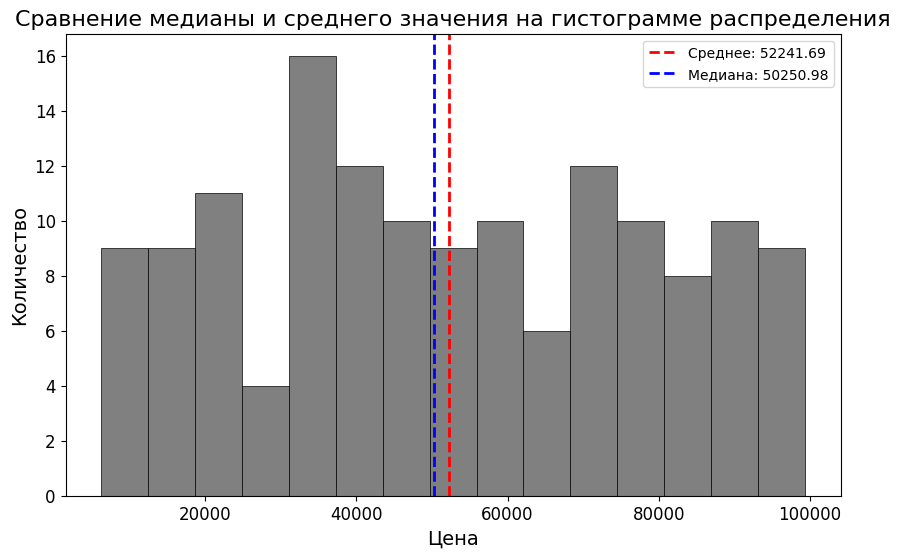

In [14]:
plt.figure(figsize=(10, 6))

plt.hist(x = used_toyotas['price'],
         bins = 15,
         color = 'grey',
         edgecolor = 'black',
         linewidth = 0.5)

mean = used_toyotas['price'].mean()
median = used_toyotas['price'].median()

plt.axvline(mean, linestyle = '--', color = 'red', linewidth = 2, label = f'Среднее: {mean:.2f}')
plt.axvline(median, linestyle = '--', color = 'blue', linewidth = 2, label = f'Медиана: {median:.2f}')

plt.title('Сравнение медианы и среднего значения на гистограмме распределения', fontsize = 16)
plt.xlabel('Цена', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Количество', fontsize = 14)
plt.yticks(fontsize = 12)
plt.legend()

plt.show()

## Распределение и его виды

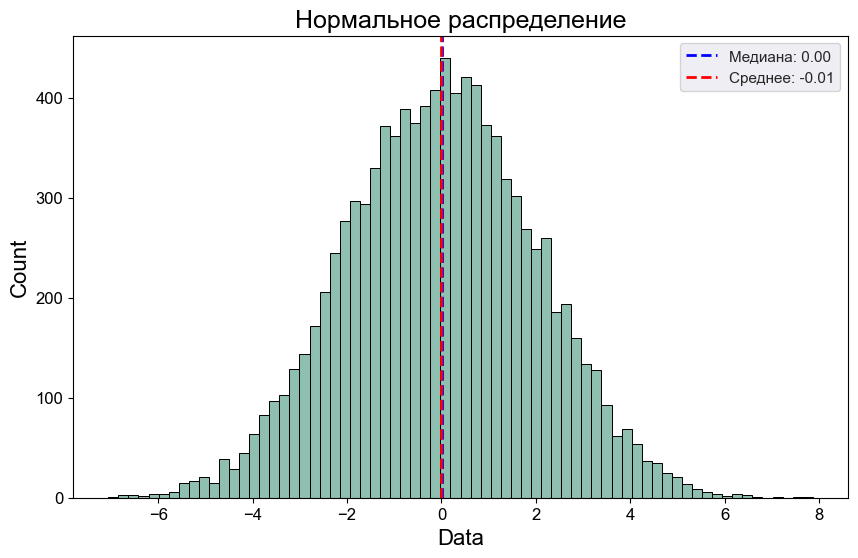

In [15]:
# Создаем массив с нормальным распределением (среднее = 0, стандартное отклонение = 2, размер = 10000)
norm_arr = pd.DataFrame(np.random.normal(0, 2, size=10000), columns=['data'])

# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для визуализации нормального распределения
sns.histplot(data=norm_arr,
             x='data',
             bins=70,
             color='#6aaa96')
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook")

# Рассчитываем среднее и медиану
mean = norm_arr['data'].mean()
median = norm_arr['data'].median()

# Добавляем заголовок и подписи осей
plt.title('Нормальное распределение', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=12)

# Добавляем вертикальные линии для среднего и медианы
plt.axvline(median, linestyle='--', color='blue', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mean, linestyle='--', color='red', linewidth=2, label=f'Среднее: {mean:.2f}')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

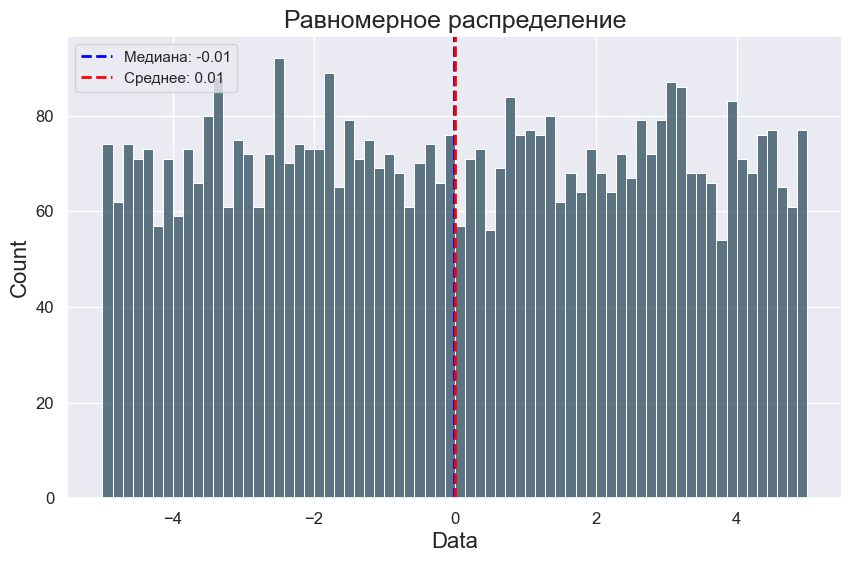

In [16]:
# Создаем массив с равномерным распределением 
norm_arr = pd.DataFrame(np.random.uniform(low=-5, high=5, size=5000), columns=['data'])

# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для визуализации равномерного распределения
sns.histplot(data=norm_arr,
             x='data',
             bins=70,
             color='#2C4D5B')
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook")

# Рассчитываем среднее и медиану
mean = norm_arr['data'].mean()
median = norm_arr['data'].median()

# Добавляем заголовок и подписи осей
plt.title('Равномерное распределение', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=12)

# Добавляем вертикальные линии для среднего и медианы
plt.axvline(median, linestyle='--', color='blue', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mean, linestyle='--', color='red', linewidth=2, label=f'Среднее: {mean:.2f}')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

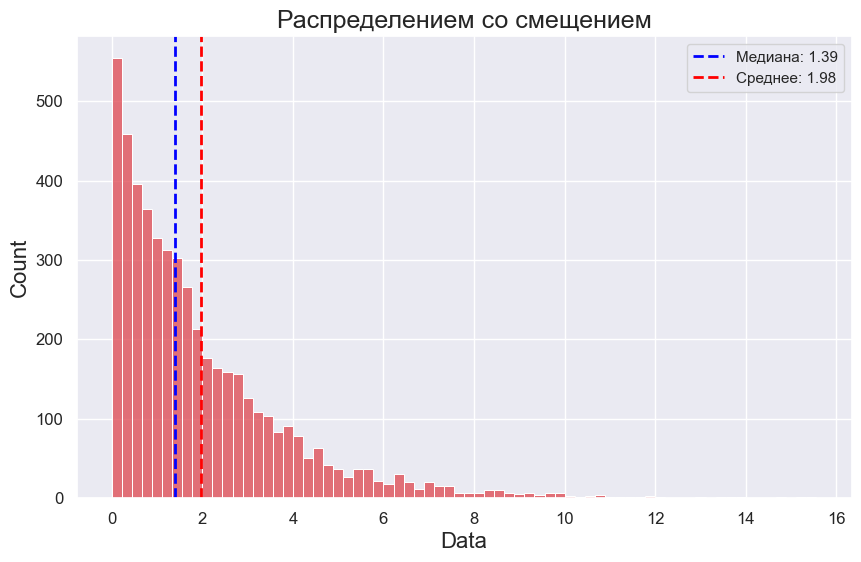

In [17]:
# Создаем массив со смещением
norm_arr = pd.DataFrame(np.random.exponential(scale=2, size=5000), columns=['data'])

# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для визуализации распределения со смещением
sns.histplot(data=norm_arr,
             x='data',
             bins=70,
             color='#DE464E')
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook")

# Рассчитываем среднее и медиану
mean = norm_arr['data'].mean()
median = norm_arr['data'].median()

# Добавляем заголовок и подписи осей
plt.title('Распределением со смещением', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=12)

# Добавляем вертикальные линии для среднего и медианы
plt.axvline(median, linestyle='--', color='blue', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mean, linestyle='--', color='red', linewidth=2, label=f'Среднее: {mean:.2f}')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

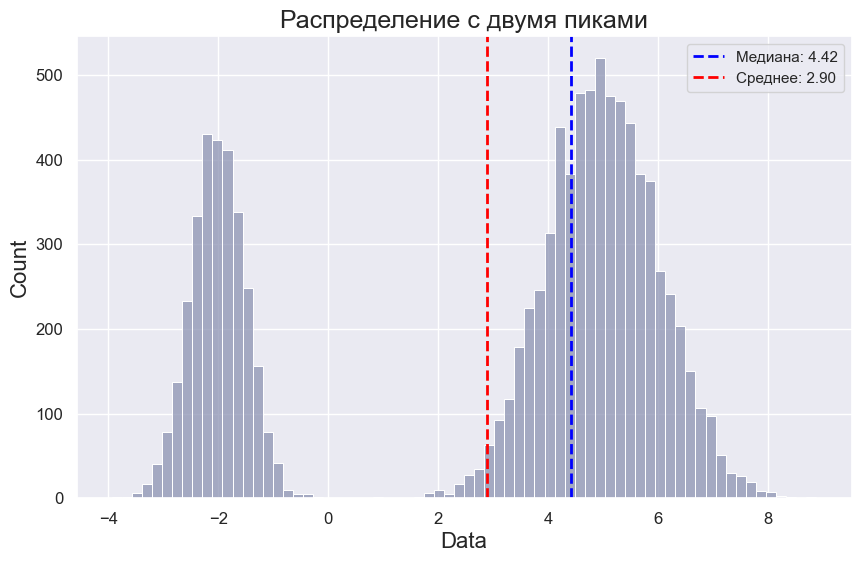

In [18]:
# Создаем массив с двумя пиками
main_peak = np.random.normal(loc=5, scale=1, size=7000)  # Основная вершина справа
secondary_peak = np.random.normal(loc=-2, scale=0.5, size=3000)  # Меньшая вершина слева
combined_data = np.concatenate([main_peak, secondary_peak])  # Объединяем данные

# Преобразуем данные в DataFrame для удобства работы
norm_arr = pd.DataFrame(combined_data, columns=['data'])

# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для визуализации распределения с двумя пиками
sns.histplot(data=norm_arr,
             x='data',
             bins=70,
             color='#8D93B3')  # Цвет графика

# Настройка стилей Seaborn
sns.set_theme(style="darkgrid")  # Темный фон с сеткой
sns.set_palette("pastel")  # Пастельная цветовая палитра
sns.set_context("notebook")  # Контекст для улучшения масштаба графика

# Рассчитываем среднее и медиану
mean = norm_arr['data'].mean()
median = norm_arr['data'].median()

# Добавляем заголовок и подписи осей
plt.title('Распределение с двумя пиками', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=12)

# Добавляем вертикальные линии для среднего и медианы
plt.axvline(median, linestyle='--', color='blue', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mean, linestyle='--', color='red', linewidth=2, label=f'Среднее: {mean:.2f}')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

## Квантиль

In [19]:
# для начала расчитаем квантиль используя ручной подход

# подключаем датасет
emp = pd.read_csv('data/emp.csv')

# приводим заголовки столбцов к snake_case
emp.columns = emp.columns.str.lower()

# смотрим на данные
emp.describe().round(2)

,base_salary,overtime_pay,longevity_pay
count,10291.00,10291.00,10291.00
mean,90312.17,8081.29,1533.88
std,31240.84,16491.83,3209.04
min,11147.24,0.00,0.00
25%,70023.00,0.00,0.00
50%,87328.00,258.42,0.00
75%,108084.00,9190.97,1225.68
max,292000.00,227428.99,20279.46


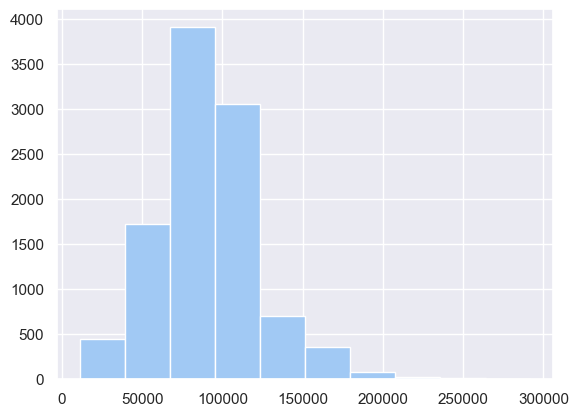

In [20]:
plt.hist(x = emp['base_salary'])

plt.show()

In [21]:
# найдем 0.25 квантиль используя pandas
print(f'Найдем 0.25 квантиль используя pandas {emp["base_salary"].quantile(0.25):.2f}')

Найдем 0.25 квантиль используя pandas 70023.00


In [22]:
# найдем 0.25 квантиль используя numpy
print(f'Найдем 0.25 квантиль используя numpy {np.quantile(emp["base_salary"], 0.25):.2f}')

Найдем 0.25 квантиль используя numpy 70023.00


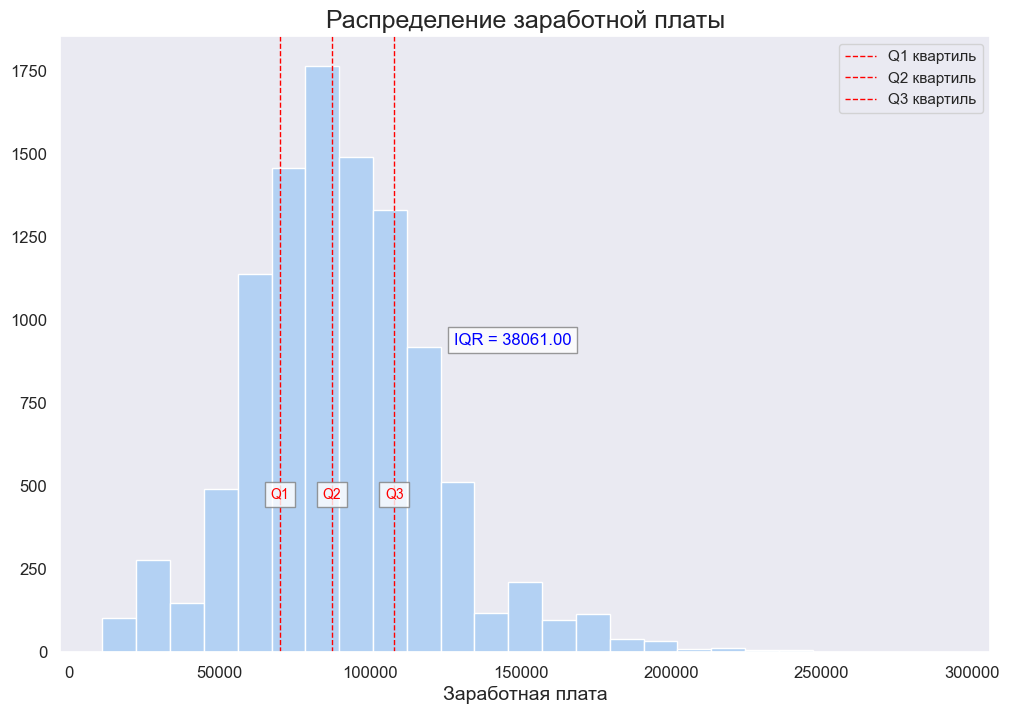

In [23]:
plt.figure(figsize=(12,8))

sns.histplot(data = emp,
             x = "base_salary",
             bins = 25)
plt.grid(False)

sns.set_palette("Set3")

Q1 = np.quantile(emp["base_salary"], 0.25)
Q2 = np.quantile(emp["base_salary"], 0.5)
Q3 = np.quantile(emp["base_salary"], 0.75)
IQR = Q3 - Q1

plt.axvline (Q1, linestyle = '--', color = "red", linewidth = 1, label = "Q1 квартиль")
plt.axvline (Q2, linestyle = '--', color = "red", linewidth = 1, label = "Q2 квартиль")
plt.axvline (Q3, linestyle = '--', color = "red", linewidth = 1, label = "Q3 квартиль")

plt.text(Q1, plt.ylim()[1] * 0.25, f"Q1", color="red", fontsize=10, ha="center",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(Q2, plt.ylim()[1] * 0.25, f"Q2", color="red", fontsize=10, ha="center",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(Q3, plt.ylim()[1] * 0.25, f"Q3", color="red", fontsize=10, ha="center",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.text(Q3 + (plt.xlim()[1] - Q3) * 0.1, plt.ylim()[1] * 0.5, f"IQR = {IQR:.2f}",
         color="blue", fontsize=12, ha="left",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))


plt.title('Распределение заработной платы', fontsize = 18)
plt.xlabel('Заработная плата', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('', fontsize = 14)
plt.yticks(fontsize = 12)
plt.legend()

plt.show()

Разность Q3 − Q1 называется межквартильным размахом (IQR — англ. Interquartile Range).  
В диапазон между Q1 и Q3 попадают 50% самых вероятных значений.  

## Выбросы

In [24]:
# попробуем найти выбросы в зарплатах сотрудников

# 1 надйем Q1 и Q3 квартили
Q1 = np.quantile(emp['base_salary'], 0.25)
Q2 = np.quantile(emp['base_salary'], 0.5)
Q3 = np.quantile(emp['base_salary'], 0.75)
print(f'Q1 квартиль base_salary составляет {Q1:,.2f}')
print(f'Q3 квартиль base_salary составляет {Q3:,.2f}')
print(f'Медиана равна {Q2:,.2f}\n')

# 2 расчитаем межквартильный размер IQR
IQR = Q3 - Q1
print(f'IQR составляет {IQR:,.2f}')
print(f'50% зарплат находятся в диапазоне от {Q1:,.2f} до {Q3:,.2f}')
print(f'Чем больше IQR, тем больше разброс в зарплатах среди основной массы сотрудников.\n')

# 3 определим границы выбросов
low_border = Q1 - IQR * 1.5
high_border = Q3 + IQR * 1.5
print(f'Любая запралата меньше {low_border:,.2f} больше {high_border:,.2f} является выбросом')

Q1 квартиль base_salary составляет 70,023.00
Q3 квартиль base_salary составляет 108,084.00
Медиана равна 87,328.00

IQR составляет 38,061.00
50% зарплат находятся в диапазоне от 70,023.00 до 108,084.00
Чем больше IQR, тем больше разброс в зарплатах среди основной массы сотрудников.

Любая запралата меньше 12,931.50 больше 165,175.50 является выбросом


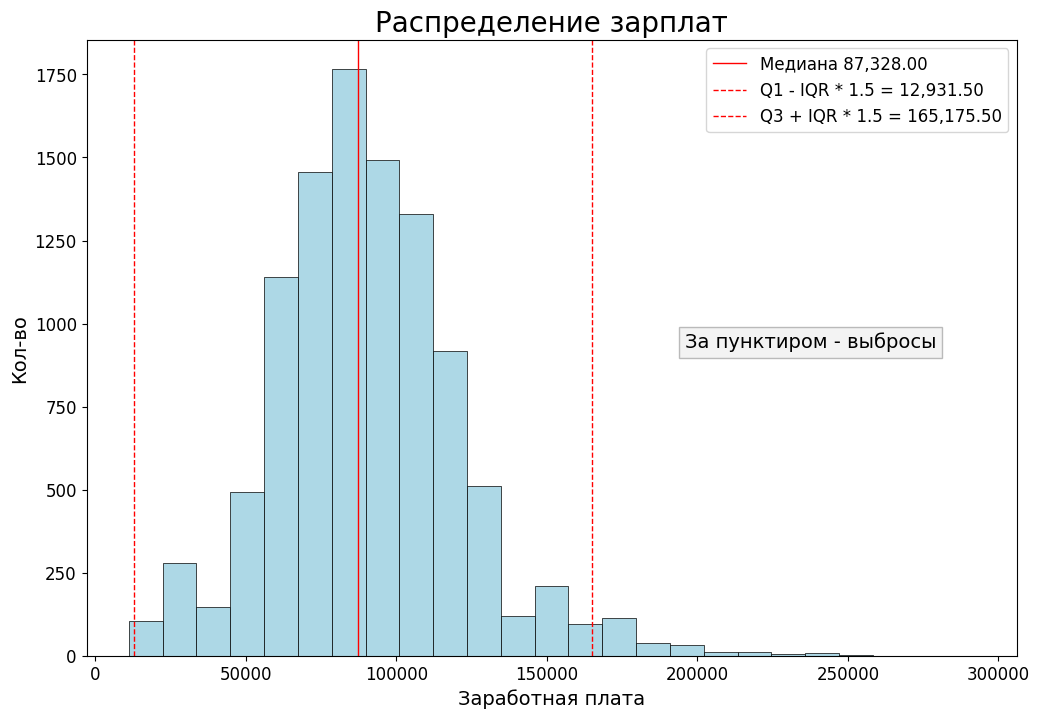

In [25]:
plt.figure(figsize = (12, 8), facecolor='white')
plt.style.use('default') 

plt.hist(x = emp['base_salary'],
             bins = 25,
             color = 'lightblue',
             edgecolor = 'black',
             linewidth = 0.5)

plt.grid(False)

plt.title('Распределение зарплат', fontsize = 20)
plt.xlabel('Заработная плата', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Кол-во', fontsize = 14)
plt.yticks(fontsize = 12)

plt.axvline(Q2, color = 'red', linewidth = 1, label = f'Медиана {Q2:,.2f}')
plt.axvline(low_border, linestyle = '--', linewidth = 1, color = 'red', label = f'Q1 - IQR * 1.5 = {low_border:,.2f}')
plt.axvline(high_border, linestyle = '--', linewidth = 1, color = 'red', label = f'Q3 + IQR * 1.5 = {high_border:,.2f}')

plt.text(high_border + plt.xlim()[1] * 0.1, plt.ylim()[1]* 0.5, 'За пунктиром - выбросы', fontsize = 14,
         bbox=dict(facecolor='lightgrey', alpha=0.25, edgecolor='black'))

plt.legend(fontsize = 12)

plt.show()

## Ящик с усами

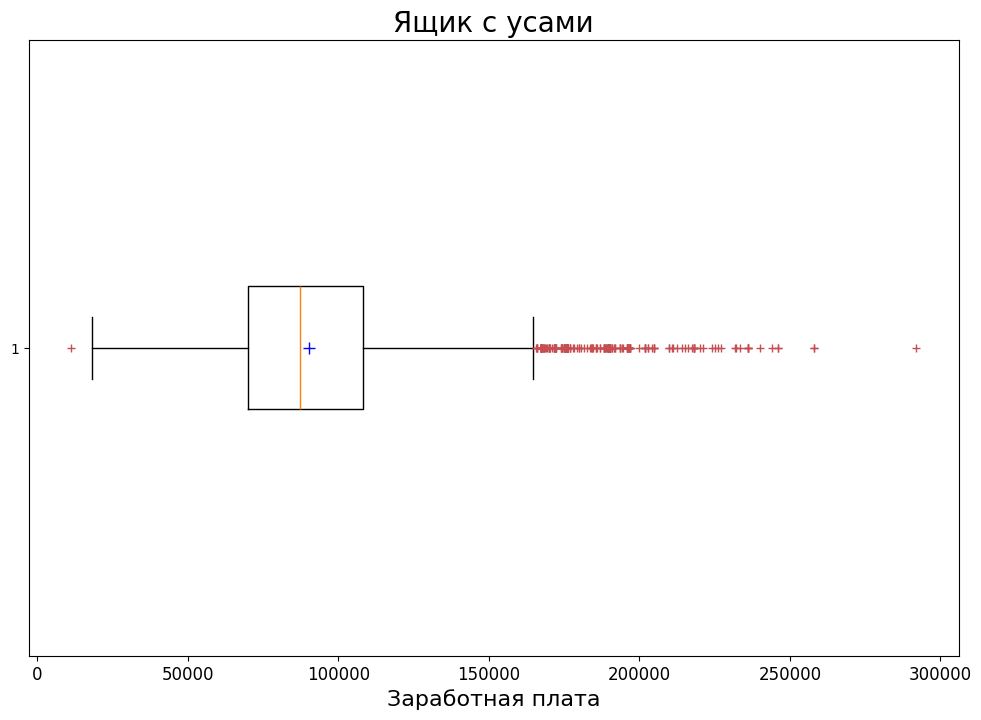

In [26]:
# используя данные о зарплате построим визуализацию Ящик с усами

plt.figure(figsize = (12, 8))

plt.boxplot(x = emp['base_salary'], # данные для построения графика
            sym='r+', # символы и цвет для отображения выбросов
            vert = False, # строим график горизонтально
            whis = 1.5, # длина усов
            widths=0.2, # высота ящика
            showmeans=True, # метка отображения среднего
            meanprops={'marker': '+', # настройка маркера среднего значения
                       'markerfacecolor': 'blue', 
                       'markeredgecolor': 'blue',
                       'markersize': 8})

plt.title('Ящик с усами', fontsize = 20)
plt.xlabel('Заработная плата', fontsize = 16)
plt.xticks(fontsize = 12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

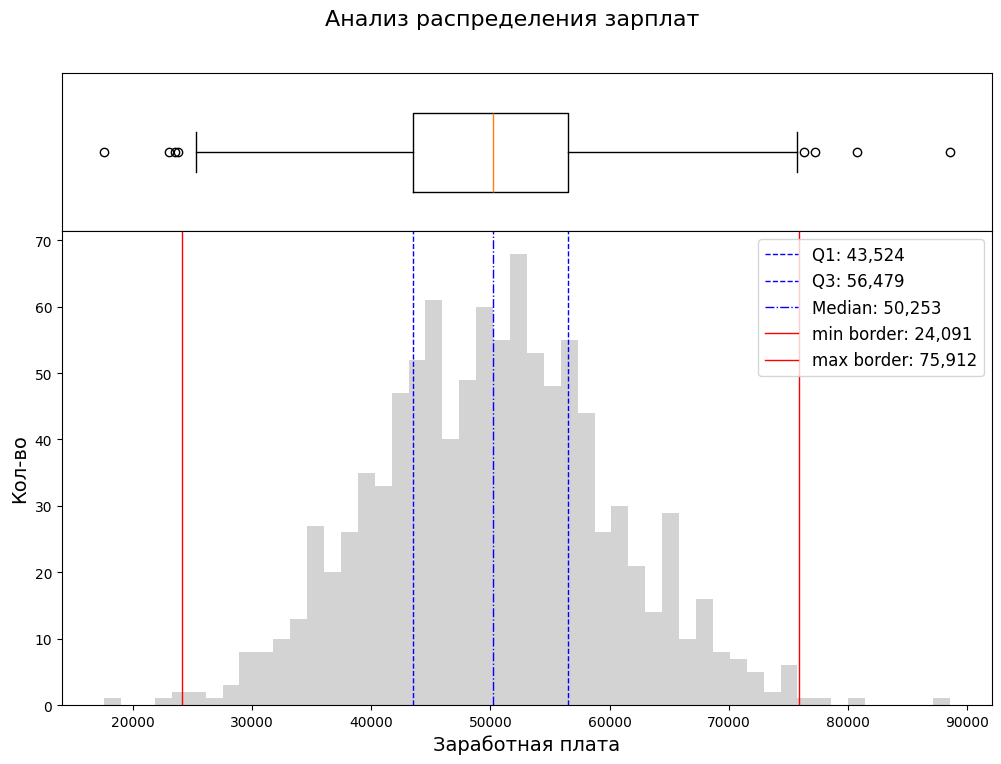

In [ ]:
# определение фигуры
fig, (ax_boxplot, ax_hist) = plt.subplots(2, 1, # 2 ячейки в одном столбике
                                          figsize = (12, 8), # определение размера
                                          gridspec_kw={'height_ratios': [1, 3]}) # соотношение 1 и 2 графика

fig.suptitle('Анализ распределения зарплат', fontsize=16)
# Настройка отступов 
plt.subplots_adjust(top= 0.9, # top=0.9 уменьшает отступ сверху
                    hspace=0)  # настройка отступов между графиками

# настройка ящика с усами
ax_boxplot.boxplot(x = emp['base_salary'],
                   vert = False,
                   widths = 0.5,
                   whis = 1.5
)
# удаляем подписи значений на осях для ящика с усами
ax_boxplot.set_xticks([])
ax_boxplot.set_yticks([])

# настройка гистограммы распределения
ax_hist.hist(x = emp['base_salary'],
             bins = 50,
             color = 'lightgrey')

# настройка подписей осей
ax_hist.set_xlabel('Заработная плата', fontsize = 14)
ax_hist.tick_params(axis = 'x', labelsize = 10)
ax_hist.set_ylabel('Кол-во', fontsize = 14)
ax_hist.tick_params(axis = 'y', labelsize = 10)

# дополнительыне вычисления
Q1 = np.quantile(emp['base_salary'], 0.25)
Q2 = np.quantile(emp['base_salary'], 0.5)
Q3 = np.quantile(emp['base_salary'], 0.75)
IQR = Q3 - Q1
low_border = Q1 - IQR * 1.5
high_border = Q3 + IQR * 1.5

# вывод дополнительных строк
ax_hist.axvline(x = Q1, color = 'blue', linestyle = '--', linewidth = 1, label = f'Q1: {Q1:,.0f}')
ax_hist.axvline(x = Q3, color = 'blue', linestyle = '--', linewidth = 1, label = f'Q3: {Q3:,.0f}')
ax_hist.axvline(x = Q2, color = 'blue', linestyle = '-.', linewidth = 1, label = f'Median: {Q2:,.0f}')
ax_hist.axvline(x = low_border, color = 'red', linestyle = '-', linewidth = 1, label = f'min border: {low_border:,.0f}')
ax_hist.axvline(x = high_border, color = 'red', linestyle = '-', linewidth = 1, label = f'max border: {high_border:,.0f}')

# легенда
plt.legend(fontsize = 12, loc='upper right')

# выводим график на экран
plt.show